In [4]:
import pandas as pd
import re
import geopandas as gpd

In [17]:
df = pd.read_csv("ct_data/ACSDP5YSPT2010.DP03-Data.csv",skiprows=[1], low_memory=False)

In [18]:
col_names = pd.Series(df.columns)
useful_idx = ["GEO_ID"]
useful_idx.extend(col_names[col_names.apply(lambda x: x[-1]=="E")])

In [19]:
useful_idx

['GEO_ID',
 'NAME',
 'DP03_0001E',
 'DP03_0001PE',
 'DP03_0002E',
 'DP03_0002PE',
 'DP03_0003E',
 'DP03_0003PE',
 'DP03_0004E',
 'DP03_0004PE',
 'DP03_0005E',
 'DP03_0005PE',
 'DP03_0006E',
 'DP03_0006PE',
 'DP03_0007E',
 'DP03_0007PE',
 'DP03_0008E',
 'DP03_0008PE',
 'DP03_0009E',
 'DP03_0009PE',
 'DP03_0010E',
 'DP03_0010PE',
 'DP03_0011E',
 'DP03_0011PE',
 'DP03_0012E',
 'DP03_0012PE',
 'DP03_0013E',
 'DP03_0013PE',
 'DP03_0014E',
 'DP03_0014PE',
 'DP03_0015E',
 'DP03_0015PE',
 'DP03_0016E',
 'DP03_0016PE',
 'DP03_0017E',
 'DP03_0017PE',
 'DP03_0018E',
 'DP03_0018PE',
 'DP03_0019E',
 'DP03_0019PE',
 'DP03_0020E',
 'DP03_0020PE',
 'DP03_0021E',
 'DP03_0021PE',
 'DP03_0022E',
 'DP03_0022PE',
 'DP03_0023E',
 'DP03_0023PE',
 'DP03_0024E',
 'DP03_0024PE',
 'DP03_0025E',
 'DP03_0025PE',
 'DP03_0026E',
 'DP03_0026PE',
 'DP03_0027E',
 'DP03_0027PE',
 'DP03_0028E',
 'DP03_0028PE',
 'DP03_0029E',
 'DP03_0029PE',
 'DP03_0030E',
 'DP03_0030PE',
 'DP03_0031E',
 'DP03_0031PE',
 'DP03_0032E',
 'DP

In [20]:
df["POPGROUP"].describe()

count    1392.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: POPGROUP, dtype: float64

In [21]:
df["POPGROUP_LABEL"].describe()

count                 1392
unique                   1
top       Total population
freq                  1392
Name: POPGROUP_LABEL, dtype: object

In [22]:
df[useful_idx]

,GEO_ID,NAME,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,DP03_0133E,DP03_0133PE,DP03_0134E,DP03_0134PE,DP03_0135E,DP03_0135PE,DP03_0136E,DP03_0136PE,DP03_0137E,DP03_0137PE
0,1400000US55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,45.0,...,(X),3.5,(X),5.3,(X),0.0,(X),2.4,(X),12.2
1,1400000US55001950201,"Census Tract 9502.01, Adams County, Wisconsin",1349,1349,765,56.7,765,56.7,663,49.1,...,(X),11.4,(X),12.7,(X),7.1,(X),9.2,(X),27.6
2,1400000US55001950202,"Census Tract 9502.02, Adams County, Wisconsin",2339,2339,1179,50.4,1168,49.9,1056,45.1,...,(X),10.4,(X),12.7,(X),4.9,(X),12.2,(X),20.6
3,1400000US55001950400,"Census Tract 9504, Adams County, Wisconsin",3937,3937,2096,53.2,2093,53.2,1901,48.3,...,(X),16.3,(X),18.8,(X),9.4,(X),14.3,(X),30.4
4,1400000US55001950501,"Census Tract 9505.01, Adams County, Wisconsin",1303,1303,676,51.9,676,51.9,614,47.1,...,(X),8.7,(X),10.0,(X),6.3,(X),5.8,(X),22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1400000US55141011300,"Census Tract 113, Wood County, Wisconsin",3591,3591,2144,59.7,2144,59.7,2019,56.2,...,(X),5.9,(X),3.5,(X),12.0,(X),1.6,(X),17.3
1388,1400000US55141011400,"Census Tract 114, Wood County, Wisconsin",4443,4443,2415,54.4,2415,54.4,2187,49.2,...,(X),5.7,(X),5.7,(X),5.8,(X),6.5,(X),11.9
1389,1400000US55141011500,"Census Tract 115, Wood County, Wisconsin",4793,4793,3386,70.6,3373,70.4,3208,66.9,...,(X),0.9,(X),0.8,(X),1.8,(X),0.0,(X),10.3
1390,1400000US55141011600,"Census Tract 116, Wood County, Wisconsin",4209,4209,2746,65.2,2746,65.2,2514,59.7,...,(X),4.7,(X),3.1,(X),11.3,(X),2.9,(X),10.5


In [23]:
geo = gpd.read_file("zip://ct_data/tl_2022_55_tract.zip")

<AxesSubplot:>

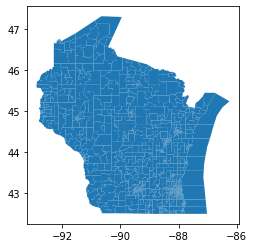

In [24]:
geo.plot()

In [26]:
geo['geometry']

0       POLYGON ((-88.15018 44.51202, -88.15010 44.513...
1       POLYGON ((-87.99468 44.48806, -87.99463 44.488...
2       POLYGON ((-87.95519 44.51945, -87.95512 44.519...
3       POLYGON ((-88.00750 44.53416, -88.00528 44.538...
4       POLYGON ((-92.55310 45.94872, -92.55302 45.948...
                              ...                        
1537    POLYGON ((-90.65769 43.05224, -90.65765 43.052...
1538    POLYGON ((-91.07932 42.82298, -91.07897 42.825...
1539    POLYGON ((-90.69007 42.60893, -90.68964 42.609...
1540    POLYGON ((-90.82488 42.78242, -90.82475 42.782...
1541    POLYGON ((-90.02638 44.08721, -90.02627 44.089...
Name: geometry, Length: 1542, dtype: geometry

In [27]:
geo

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,55,009,940002,55009940002,9400.02,Census Tract 9400.02,G5020,S,11531694,0,+44.5157530,-088.1259731,"POLYGON ((-88.15018 44.51202, -88.15010 44.513..."
1,55,009,001600,55009001600,16,Census Tract 16,G5020,S,3538241,8847,+44.4885958,-087.9835008,"POLYGON ((-87.99468 44.48806, -87.99463 44.488..."
2,55,009,001801,55009001801,18.01,Census Tract 18.01,G5020,S,11713129,34950,+44.5146596,-087.9165411,"POLYGON ((-87.95519 44.51945, -87.95512 44.519..."
3,55,009,001802,55009001802,18.02,Census Tract 18.02,G5020,S,20140123,20678230,+44.5256892,-087.9732410,"POLYGON ((-88.00750 44.53416, -88.00528 44.538..."
4,55,013,970700,55013970700,9707,Census Tract 9707,G5020,S,279301854,28103929,+45.8803599,-092.3950567,"POLYGON ((-92.55310 45.94872, -92.55302 45.948..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,55,043,960100,55043960100,9601,Census Tract 9601,G5020,S,364751532,3687082,+43.0851304,-090.5338688,"POLYGON ((-90.65769 43.05224, -90.65765 43.052..."
1538,55,043,960500,55043960500,9605,Census Tract 9605,G5020,S,569067967,31187513,+42.8066244,-090.8677346,"POLYGON ((-91.07932 42.82298, -91.07897 42.825..."
1539,55,043,961100,55043961100,9611,Census Tract 9611,G5020,S,188421247,10418252,+42.6224241,-090.5534011,"POLYGON ((-90.69007 42.60893, -90.68964 42.609..."
1540,55,043,960600,55043960600,9606,Census Tract 9606,G5020,S,495955434,40951,+42.8491345,-090.5857485,"POLYGON ((-90.82488 42.78242, -90.82475 42.782..."
